In [10]:
cd ..

/Users/nicolevandeweijer/PycharmProjects/ma-communicative-robots-fork/projects/memory


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
import json
from glob import glob
from tqdm.notebook import tqdm
import os
import random

from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("tscholak/t5.1.1.lm100k.base")
model = T5ForConditionalGeneration.from_pretrained("tscholak/t5.1.1.lm100k.base")

def read_json(path):
    """Read json file.
    
    Args
    ----
    path: path to the json

    Returns
    -------
    loaded: loaded dict
    
    """
    with open(path, 'r') as stream:
        loaded = json.load(stream)

    return loaded

## Metrics train set

In [40]:
pred_answers_train = []
correct_answers_train = []
for path in tqdm(glob("./data/*.json")):
    data = read_json(path)
    for i in data['train']:
        pred_answer = (i.get('prediction_hand_crafted'))
        

        correct_answer = (i.get('correct_answer'))
        
        if pred_answer is not None:
            pred_answers_train.append(pred_answer)
            correct_answers_train.append(correct_answer)

  0%|          | 0/7 [00:00<?, ?it/s]

In [34]:
p_r_f_train = precision_recall_fscore_support(correct_answers_train, pred_answers_train, average='weighted')
acc_train = accuracy_score(correct_answers_train, pred_answers_train)

print(f"Accuracy: {acc_train}")
print(f"Precision: {p_r_f_train[0]}")
print(f"Recall: {p_r_f_train[1]}")
print(f"Fscore: {p_r_f_train[2]}")

Accuracy: 0.9497354497354498
Precision: 0.9583211738600209
Recall: 0.9497354497354498
Fscore: 0.9461795224020143


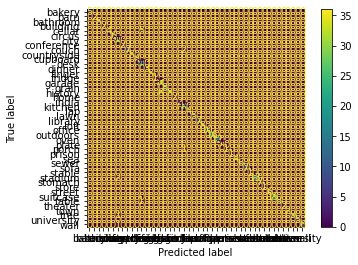

In [35]:
ConfusionMatrixDisplay.from_predictions(correct_answers_train, pred_answers_train)
plt.show()

## Metrics val set

In [36]:
pred_answers_val = []
correct_answers_val = []
for path in tqdm(glob("./data/*.json")):
    data = read_json(path)
    for i in data['val']:
        pred_answer = (i.get('prediction_hand_crafted'))
        

        correct_answer = (i.get('correct_answer'))
        
        if pred_answer is not None:
            pred_answers_val.append(pred_answer)
            correct_answers_val.append(correct_answer)

  0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
p_r_f_val = precision_recall_fscore_support(correct_answers_val, pred_answers_val, average='weighted')
acc_val = accuracy_score(correct_answers_val, pred_answers_val)

print(f"Accuracy: {acc_val}")
print(f"Precision: {p_r_f_val[0]}")
print(f"Recall: {p_r_f_val[1]}")
print(f"Fscore: {p_r_f_val[2]}")

Accuracy: 0.9697674418604652
Precision: 0.976839594514013
Recall: 0.9697674418604652
Fscore: 0.9664739208043137


## Metrics test set

In [38]:
pred_answers_test = []
correct_answers_test = []
for path in tqdm(glob("./data/*.json")):
    data = read_json(path)
    for i in data['test']:
        pred_answer = (i.get('prediction_hand_crafted'))
        

        correct_answer = (i.get('correct_answer'))
        
        if pred_answer is not None:
            pred_answers_test.append(pred_answer)
            correct_answers_test.append(correct_answer)

  0%|          | 0/7 [00:00<?, ?it/s]

In [39]:
p_r_f_test = precision_recall_fscore_support(correct_answers_test, pred_answers_test, average='weighted')
acc_test = accuracy_score(correct_answers_test, pred_answers_test)

print(f"Accuracy: {acc_test}")
print(f"Precision: {p_r_f_test[0]}")
print(f"Recall: {p_r_f_test[1]}")
print(f"Fscore: {p_r_f_test[2]}")

Accuracy: 0.9865591397849462
Precision: 0.9897465437788019
Recall: 0.9865591397849462
Fscore: 0.9862781589062425
